# <div align="center">  Capstone Assignment Notebook

<div align="center">-Sanjeet Manchanda

#    Assignment - Part 1

In [1]:
#Import urllib library to webscrap
import urllib.request
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

In [2]:
#Preparing for scraping
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")


In [3]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=soup.find_all("table")
all_tables

# Asour table is the only one that is sortable bringing back the sortable table to isolate the table

right_table=soup.find('table', class_='wikitable sortable')


In [4]:
#Using Temp placeholders to store the values for each column

A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        
        


In [5]:
#importing pandas and creating the dataframe from temp cells

import pandas as pd

df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighbourhood']=C


df

,PostalCode,Borough,Neighbourhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
...,...,...,...
175,M5Z\n,Not assigned\n,Not assigned\n
176,M6Z\n,Not assigned\n,Not assigned\n
177,M7Z\n,Not assigned\n,Not assigned\n
178,M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor,..."


In [6]:
#Cleaning up the Data for garbage characters in all columns

df = df.applymap(lambda x: x.lstrip('+-').rstrip('\n'))

df.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [7]:
#Data rows without ny neighbourhood assigned are not of any use to us- so we will remove rows with Neighbourhood is Not Assigned

df.drop(df.loc[df['Neighbourhood']=='Not assigned'].index, inplace=True)

df.head()

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


# End of Assignment Part 1

# Assignment Part 2 - Start

In [8]:
!wget -q -O 'geo_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')


    
    

Data downloaded!


In [9]:
import pandas as pd

In [10]:
data = pd.read_csv("geo_data.csv")

In [11]:
data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
#Renamed the Column Header to be able to compare it to our original data frame


data = data.rename(columns={"Postal Code": "PostalCode"})

data.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
#Combining Two Data Frames to get final data to work on

tor_df = pd.merge(df, data, on = 'PostalCode')


tor_df = tor_df.rename(columns={"Neighbourhood": "Neighborhood"})

tor_df.head()



,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# Let's do a High Level Analysis of our final data

In [14]:


print('The Datafram has {} boroughs and {} neighborhoods.'.format(
        len(tor_df['Borough'].unique()),
        tor_df.shape[0]
    )
)

The Datafram has 10 boroughs and 103 neighborhoods.


# Install Liabraries for Maps

In [15]:
!pip install folium
import folium

print('Folium installed and imported!')


     |████████████████████████████████| 94 kB 5.6 MB/s  eta 0:00:01
Folium installed and imported!


# Greater Toronoto with Neighbourhoods superimposed  on a Map

In [16]:
#Toronot Co-ordinates : 
latitude = 43.651070
longitude = -79.347015
print('By Googles courtsey, we know The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

By Googles courtsey, we know The geograpical coordinate of Toronto are 43.65107, -79.347015.


In [17]:
# create map of Toronto  using latitude and longitude values
map_GTA = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(tor_df['Latitude'], tor_df['Longitude'], tor_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  
    
map_GTA

# Using foursquare API to loop through all the neighbourhoods and getting top venues for each neighbourhood

In [18]:
#passing credentials for foursquare API

CLIENT_ID = 'IID2N1ETW2II2IX5QUWON20EJZF2VBPHLSX20ANWPRSVLG2G' # your Foursquare ID
CLIENT_SECRET = 'G4KKHRH4TDOP5R1ODOBE51PGNFJIMRDW5URPXUFB3OMTYY4N' # your Foursquare Secret
ACCESS_TOKEN = 'IXJVO12YTY1MACK11A4P3D1I2QKDQSGH0G14G0POD3SDGJLG' # {"access_token":"IXJVO12YTY1MACK11A4P3D1I2QKDQSGH0G14G0POD3SDGJLG"}
VERSION = '20201231'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IID2N1ETW2II2IX5QUWON20EJZF2VBPHLSX20ANWPRSVLG2G
CLIENT_SECRET:G4KKHRH4TDOP5R1ODOBE51PGNFJIMRDW5URPXUFB3OMTYY4N


In [19]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
tor_venues = getNearbyVenues(names=tor_df['Neighborhood'],
                                   latitudes=tor_df['Latitude'],
                                   longitudes=tor_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [21]:
print(tor_venues.shape)
tor_venues.head()

(1666, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Bella Vita Catering & Private Chef Service,43.756651,-79.331524,BBQ Joint
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


# Let's examine if we find anything interesting in the categories of famous categories

In [22]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

cat = tor_venues['Venue Category'].unique().tolist()
cat

['Park',
 'Food & Drink Shop',
 'BBQ Joint',
 'Hockey Arena',
 'Portuguese Restaurant',
 'Coffee Shop',
 'French Restaurant',
 'Bakery',
 'Distribution Center',
 'Breakfast Spot',
 'Spa',
 'Restaurant',
 'Gym / Fitness Center',
 'Historic Site',
 'Chocolate Shop',
 'Farmers Market',
 'Dessert Shop',
 'Pub',
 'Performing Arts Venue',
 'Yoga Studio',
 'Café',
 'Theater',
 'Event Space',
 'Shoe Store',
 'Brewery',
 'Art Gallery',
 'Cosmetics Shop',
 'Asian Restaurant',
 'Electronics Store',
 'Beer Store',
 'Bank',
 'Hotel',
 'Wine Shop',
 'Antique Shop',
 'Playground',
 'Boutique',
 'Furniture / Home Store',
 'Vietnamese Restaurant',
 'Clothing Store',
 'Accessories Store',
 'Athletics & Sports',
 'Italian Restaurant',
 'Beer Bar',
 'Creperie',
 'Mexican Restaurant',
 'Sushi Restaurant',
 'Diner',
 'Hobby Shop',
 'Burrito Place',
 'Fried Chicken Joint',
 'Nightclub',
 'Discount Store',
 'Japanese Restaurant',
 'Fast Food Restaurant',
 'Smoothie Shop',
 'Sandwich Place',
 'Gym',
 'College 

 **We find that 'Yoga Studio'   'Vegetarian / Vegan Restaurant' are two categories of the data that we are looking for

Let's create a new dataframe for categories and ensure that our data count is significant 

In [23]:
cat_df = tor_venues.groupby('Venue Category').count().sort_values('Neighborhood', ascending=False)
cat_df = cat_df.drop(['Neighborhood Latitude' , 'Neighborhood Longitude', 'Venue' , 'Venue Latitude', 'Venue Longitude'], 1)
cat_df =cat_df.rename(columns={'Neighborhood': 'count'})
cat_df

,count
Venue Category,
Coffee Shop,124
Café,87
Restaurant,46
Park,46
Pizza Place,45
...,...
Hardware Store,1
Harbor / Marina,1
Hakka Restaurant,1


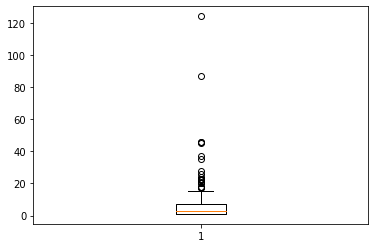

In [24]:
import matplotlib.pyplot as plt 

plt.boxplot(data=cat_df, x = 'count') 
  
plt.show() 

# The Count of Vegetarian / Vegan restaurants & Yoga studios is 13 & 12. This falls between 3rd & 4th quartiles of the data. This means our data is viable and doesn't represnet any extremeties.   


# Before we go further - Let's remove all the rows of neighborhoods that do not have Yoga Studio or Veg/vegan Restaurants in the list of top visited places. 

# These neighborhoods are eliminted as they do not feature either place of our interest so we do not want to further involve them in our data  

In [25]:
v_df=tor_venues[tor_venues['Venue Category'].isin(["Yoga Studio" , "Vegetarian / Vegan Restaurant"])]

v_df.head(50)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,"Regent Park, Harbourfront",43.654260,-79.360636,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
71,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
234,St. James Town,43.651494,-79.375418,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
280,Berczy Park,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
383,Central Bay Street,43.657952,-79.387383,Vegetarian Haven,43.656016,-79.392758,Vegetarian / Vegan Restaurant
388,Central Bay Street,43.657952,-79.387383,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
468,Thorncliffe Park,43.705369,-79.349372,Bikram Yoga East York,43.705450,-79.351448,Yoga Studio
488,"Richmond, Adelaide, King",43.650571,-79.384568,Rosalinda,43.650252,-79.385156,Vegetarian / Vegan Restaurant
678,"Little Portugal, Trinity",43.647927,-79.419750,YogaSpace,43.647607,-79.420133,Yoga Studio
688,"Little Portugal, Trinity",43.647927,-79.419750,Veghed,43.649224,-79.422326,Vegetarian / Vegan Restaurant


# Let's split this dataframe into two, one for each Yoga Studio and Veg Restaurant to visualize it on map 

In [26]:
y_df = v_df[v_df['Venue Category'].isin(["Yoga Studio"])]
r_df = v_df[v_df['Venue Category'].isin(["Vegetarian / Vegan Restaurant"])]


In [27]:
# create map of Toronto  using latitude and longitude values
map_GTA = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(y_df['Venue Latitude'], y_df['Venue Longitude'], y_df['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  

    
    
for lat, lng, label in zip(r_df['Venue Latitude'], r_df['Venue Longitude'], r_df['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  
    
map_GTA

# Let's Analyze each neighbourhood of interest deeper by applying one hot encoding 

In [35]:
# one hot encoding
tor_onehot = pd.get_dummies(v_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Neighborhood'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head(20)

,Neighborhood,Vegetarian / Vegan Restaurant,Yoga Studio
32,"Regent Park, Harbourfront",0,1
71,"Queen's Park, Ontario Provincial Government",0,1
234,St. James Town,1,0
280,Berczy Park,1,0
383,Central Bay Street,1,0
388,Central Bay Street,0,1
468,Thorncliffe Park,0,1
488,"Richmond, Adelaide, King",1,0
678,"Little Portugal, Trinity",0,1
688,"Little Portugal, Trinity",1,0


In [29]:
tor_onehot.shape

(25, 3)

 # Grouping Rows & Taking Mean of Frequency of occurance for each category to check how frequently did these categories of venues came back..


In [30]:
tor_grouped = tor_onehot.groupby('Neighborhood').mean().reset_index()
tor_grouped.shape

(18, 3)

# Clustering the Neighborhoods:

By visually inspecting the spread of studios & restaurants, it seems to have 3 clusters

In [74]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

tor_grouped_clustering = tor_grouped.drop('Neighborhood', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1], dtype=int32)

In [83]:
# add clustering labels

tor_merged = tor_df

try: 

    tor_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

except:

    tor_grouped.drop('Cluster Labels', axis=1, inplace=True)
    tor_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_grouped.set_index('Neighborhood'), on='Neighborhood')


In [84]:
tor_merged = tor_merged.dropna()
tor_merged.shape
tor_merged.head()
tor_merged['Cluster Labels'] = tor_merged['Cluster Labels'].fillna(0.0).astype(int)
tor_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Vegetarian / Vegan Restaurant,Yoga Studio
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,0.0,1.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,0.0,1.0
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,1.0,0.0
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,1.0,0.0
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,2,0.5,0.5


# Visualize the Clusters

In [94]:


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 # Let's examine each cluster in detail

In [91]:
c1 = tor_merged.loc[tor_merged['Cluster Labels'] == 0, tor_merged.columns[[2] + list(range(5, tor_merged.shape[1]))]]
c1

,Neighborhood,Cluster Labels,Vegetarian / Vegan Restaurant,Yoga Studio
15,St. James Town,0,1.0,0.0
20,Berczy Park,0,1.0,0.0
30,"Richmond, Adelaide, King",0,1.0,0.0
42,"Toronto Dominion Centre, Design Exchange",0,1.0,0.0
84,"Kensington Market, Chinatown, Grange Park",0,1.0,0.0
92,Stn A PO Boxes,0,1.0,0.0
97,"First Canadian Place, Underground city",0,1.0,0.0


# Cluster 1 clearly has plenty of known Veg restaurants but no known Yoga studios.

# Let's name it Yoga Studio Opportunity zone

In [92]:
c2 = tor_merged.loc[tor_merged['Cluster Labels'] == 1, tor_merged.columns[[2] + list(range(5, tor_merged.shape[1]))]]
c2

,Neighborhood,Cluster Labels,Vegetarian / Vegan Restaurant,Yoga Studio
2,"Regent Park, Harbourfront",1,0.0,1.0
4,"Queen's Park, Ontario Provincial Government",1,0.0,1.0
29,Thorncliffe Park,1,0.0,1.0
41,"The Danforth West, Riverdale",1,0.0,1.0
54,Studio District,1,0.0,1.0
73,"North Toronto West, Lawrence Park",1,0.0,1.0
80,"University of Toronto, Harbord",1,0.0,1.0
99,Church and Wellesley,1,0.0,1.0


# Cluster 2  has plenty of known yoga studios but no known Veg restaurants. Let's name it Restaurant Opportunity Zone

In [93]:
c3 = tor_merged.loc[tor_merged['Cluster Labels'] == 2, tor_merged.columns[[2] + list(range(5, tor_merged.shape[1]))]]
c3

,Neighborhood,Cluster Labels,Vegetarian / Vegan Restaurant,Yoga Studio
24,Central Bay Street,2,0.500000,0.500000
37,"Little Portugal, Trinity",2,0.666667,0.333333
81,"Runnymede, Swansea",2,0.500000,0.500000


# Cluster 3  has seems to be a balanced zone that has a mix of both - Great for a Vegetaria Yoga lover!

In [114]:
# create map of Toronto  using latitude and longitude values
map_GTA = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(y_df['Venue Latitude'], y_df['Venue Longitude'], c1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label ,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  

    
    
for lat, lng, label in zip(r_df['Venue Latitude'], r_df['Venue Longitude'], c2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  

    
    
    
for lat, lng, label in zip(r_df['Venue Latitude'], r_df['Venue Longitude'], c3['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GTA)  


    
    
    
map_GTA